In [1]:
import pandas as pd
import yfinance as yf
from pandas_datareader import data
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import talib 
from dateutil.relativedelta import relativedelta
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np

from Tool_v1 import *

# Machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import MinMaxScaler
yf.pdr_override()

In [2]:
stock_name=["AAPL","GOOG","AMZN","TSLA","BABA","PTPI","BTCY",'FOX',"NVDA","DIS","NKE","XOM","KO",
            "2319.HK","0700.HK","1211.HK","6133.hk",'2318.HK','1448.HK','1810.HK',"3690.HK","2018.HK"]
start="2020-12-31"
end="2023-09-30"
score=[]

In [3]:
for i in stock_name:
    #MACD619RSI21_8020
    stock_data=pct_change(i,start,end)
    stock_data=stock_data.copy()
    #指标运算
    stock_data=MACD_short(stock_data)
    stock_data=RSI(stock_data)
    stock_data=RSI_MACD(stock_data,21,80,20)
    stock_data= my_rsi(stock_data, 21)
    stock_data = stock_data.dropna()
    X = stock_data.loc[:,["Open","High","Close_price_percentage","log_return","re_close", "re_open", "MACD","Position"]].values
    #X = stock_data.loc[:,["Open","High","Low","Close"]].values
    st_x= StandardScaler()  
    X= st_x.fit_transform(X)  

    #Y = stock_data.loc[:,["up_or_down"]].values.ravel()
    Y = np.where(stock_data['Open'].shift(-1) > stock_data['Open'],1,-1)
    #Y = np.where(stock_data['Close'].shift(-1) > stock_data['Close'],1,-1)

    #X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8)

    split = int(0.7*len(stock_data))
    X_train, X_test, Y_train, Y_test = X[:split], X[split:], Y[:split], Y[split:]
    
    # Random forest
    rf = RandomForestClassifier(max_depth= 4, n_estimators=184)
    
    # Train the model on training data
    rf.fit(X_train, Y_train)
    Y_pred = rf.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    score.append(accuracy)
    print("Accuracy:", accuracy)
    
    
    print()

Accuracy: 0.8407960199004975

Accuracy: 0.8109452736318408

Accuracy: 0.8606965174129353

Accuracy: 0.8606965174129353

Accuracy: 0.736318407960199

Accuracy: 0.7810945273631841

Accuracy: 0.7611940298507462

Accuracy: 0.7711442786069652

Accuracy: 0.8109452736318408

Accuracy: 0.8208955223880597

Accuracy: 0.8159203980099502

Accuracy: 0.8258706467661692

Accuracy: 0.8308457711442786

Accuracy: 0.8367346938775511

Accuracy: 0.826530612244898

Accuracy: 0.8367346938775511

Accuracy: 0.6944444444444444

Accuracy: 0.8061224489795918

Accuracy: 0.8877551020408163

Accuracy: 0.8061224489795918

Accuracy: 0.7755102040816326

Accuracy: 0.8622448979591837



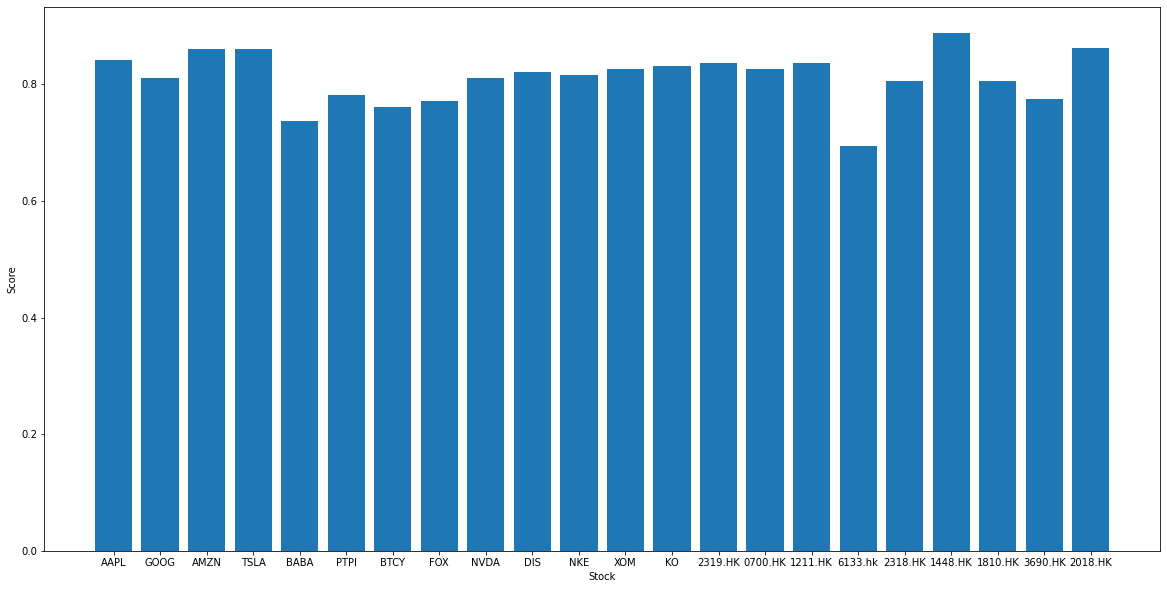

In [5]:
plt.figure(figsize=(20, 10))
plt.bar(stock_name, score)


plt.xlabel('Stock')
plt.ylabel('Score')

plt.savefig('random forest Score.png')
# 显示图形
plt.show()